In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv('retail_clean.csv')
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [36]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [37]:

df['InvoiceDate']=df['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [38]:
df['date']=pd.to_datetime(df['InvoiceDate'])

In [39]:
df['month']=df.date.dt.month
df['year']=df.date.dt.year
df['week']=df.date.dt.isocalendar().week

In [40]:
df

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,month,year,week
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,2009-12-01,12,2009,49
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,2009-12-01,12,2009,49
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,2009-12-01,12,2009,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-12-09,12,2011,49
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-12-09,12,2011,49


In [41]:
time_series=df.groupby(['week','month','year']).aggregate(
        date=('date','first'),
        total_sales=('Quantity',np.sum)
    ).reset_index().sort_values('date')

In [42]:

time_series

,week,month,year,date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


<Axes: xlabel='date', ylabel='total_sales'>

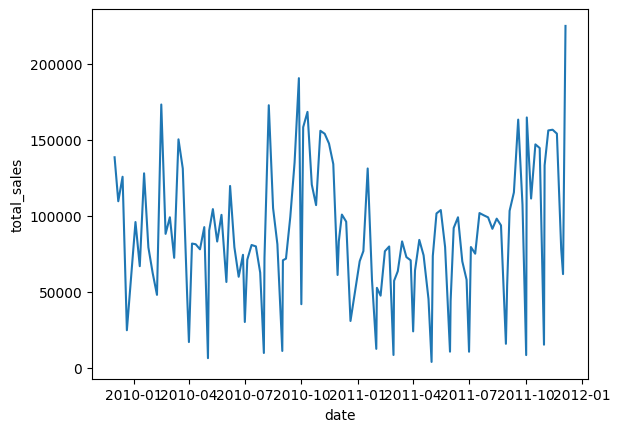

In [43]:
sns.lineplot(x='date',y='total_sales',data=time_series)

In [44]:
# resample to months

In [45]:
time_series

,week,month,year,date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


In [46]:
time_series= time_series.set_index('date')

In [47]:
time_series

,week,month,year,total_sales
date,,,,
2009-12-01,49,12,2009,138612
2009-12-07,50,12,2009,109644
2009-12-14,51,12,2009,125772
2009-12-21,52,12,2009,24680
2010-01-04,1,1,2010,95950
...,...,...,...,...
2011-11-14,46,11,2011,156756
2011-11-21,47,11,2011,154179
2011-11-28,48,11,2011,78241


In [48]:
month_series=time_series.resample('M').sum('total_sales')

In [49]:
month_series

,week,month,year,total_sales
date,,,,
2009-12-31,202,48,8036,398708
2010-01-31,10,4,8040,370128
2010-02-28,26,8,8040,371871
2010-03-31,55,15,10050,502101
2010-04-30,75,20,10050,350604
2010-05-31,95,25,10050,384960
2010-06-30,120,30,10050,389880
2010-07-31,140,35,10050,324638
2010-08-31,195,48,12060,452551


<Axes: xlabel='date'>

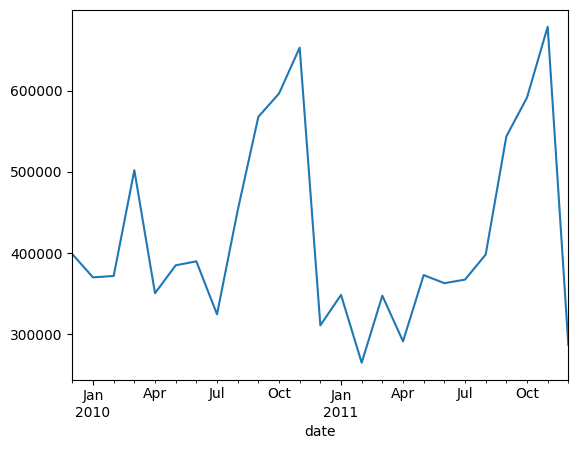

In [50]:
month_series['total_sales'].plot()

In [51]:
# time_series['total_sales'].plot()

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
month_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2009-12-31 to 2011-12-31
Freq: ME
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week         25 non-null     UInt32
 1   month        25 non-null     int32 
 2   year         25 non-null     int32 
 3   total_sales  25 non-null     int64 
dtypes: UInt32(1), int32(2), int64(1)
memory usage: 725.0 bytes


In [69]:
components=seasonal_decompose(month_series['total_sales'])

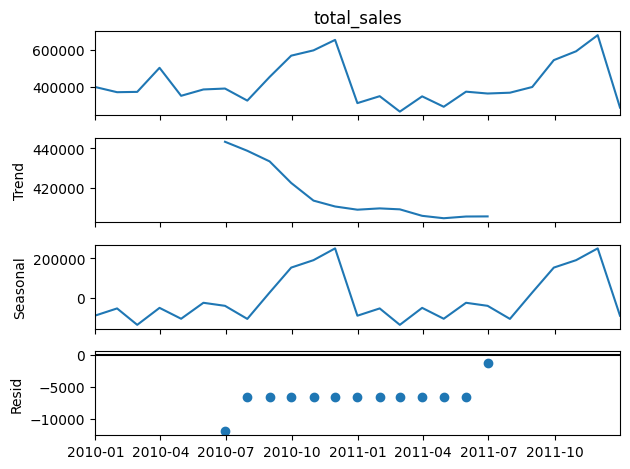

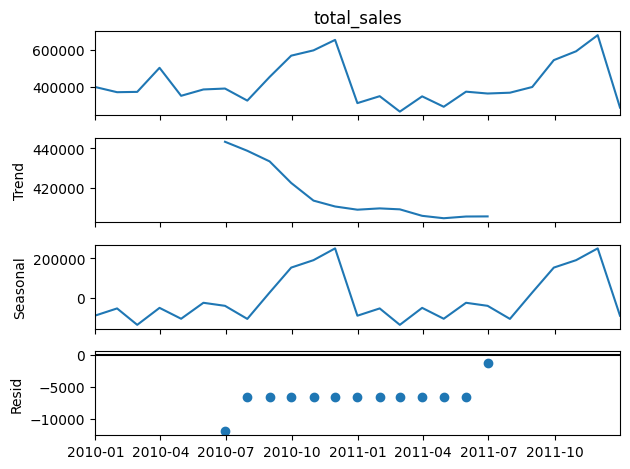

In [73]:
components.plot()

# stationarity Test

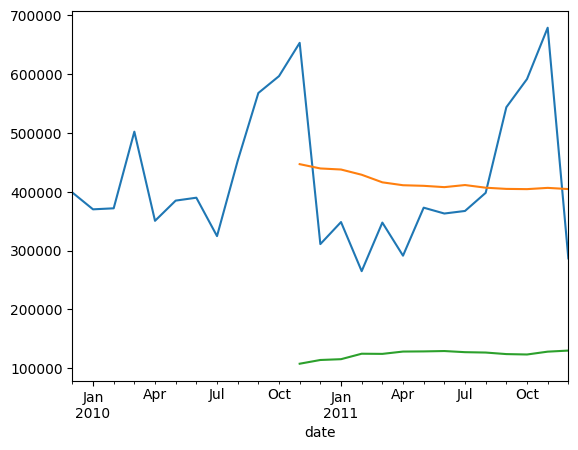

In [81]:
month_series['total_sales'].plot()
month_series['total_sales'].rolling(window=12).mean().plot()
month_series['total_sales'].rolling(window=12).std().plot()
plt.show()

In [86]:
from statsmodels.tsa.stattools import adfuller


In [90]:
ad_fuller_test=adfuller(month_series['total_sales'],autolag='AIC')

In [94]:
ad_fuller_test

(np.float64(-3.356898142962888),
 np.float64(0.012518958188462936),
 2,
 22,
 {'1%': np.float64(-3.769732625845229),
  '5%': np.float64(-3.005425537190083),
  '10%': np.float64(-2.6425009917355373)},
 np.float64(397.22710967925735))

In [95]:
# g=hence 2nd values less than 0.5 ,hence our data is statinary

# ARIMA

In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

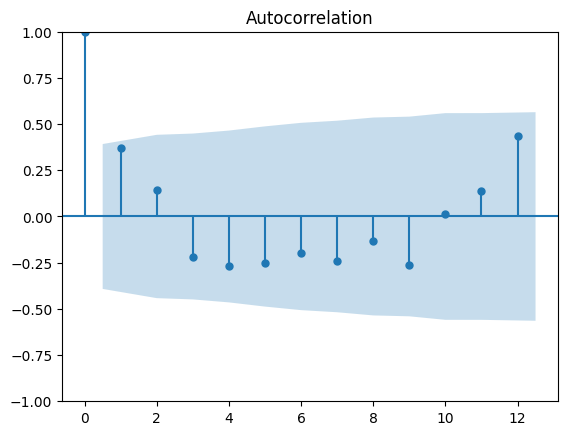

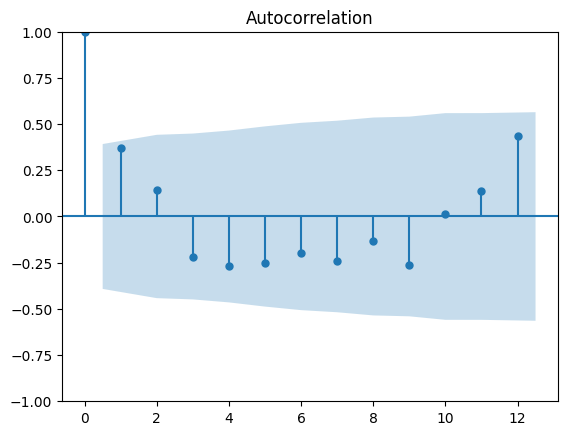

In [100]:

plot_acf(month_series['total_sales'])


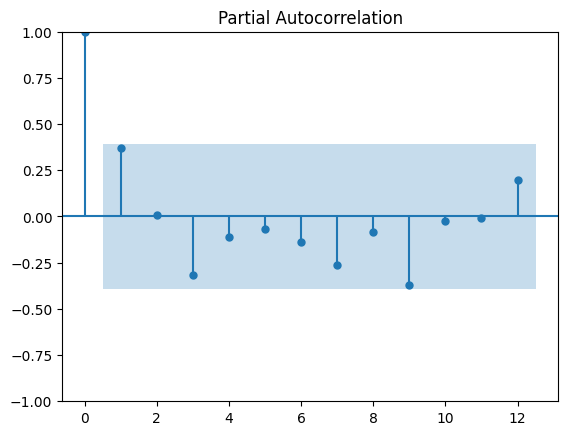

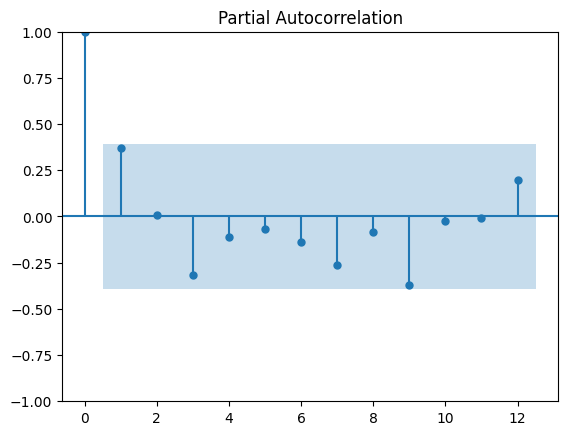

In [101]:
plot_pacf(month_series['total_sales'])

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [129]:
model_ma=SARIMAX(month_series['total_sales'],order=[0,0,1])
model_ma

In [130]:

results_ma=model_ma.fit()

In [131]:
model_ar=SARIMAX(month_series['total_sales'],order=[1,0,0])
model_ar

In [132]:

results_ar=model_ar.fit()

In [133]:
results_ma.aic

np.float64(708.0230586495467)

In [134]:
results_ar.aic

np.float64(665.3244111102928)

In [135]:
model_arma=SARIMAX(month_series['total_sales'],order=[1,0,1])
model_arma

In [136]:

results_arma=model_arma.fit()

In [137]:
results_arma.aic

np.float64(666.2593950268296)

In [138]:

model_arima=SARIMAX(month_series['total_sales'],order=[1,1,1])
model_arima

In [139]:

results_arima=model_arima.fit()


In [140]:
results_arima.aic


np.float64(638.1114103614025)

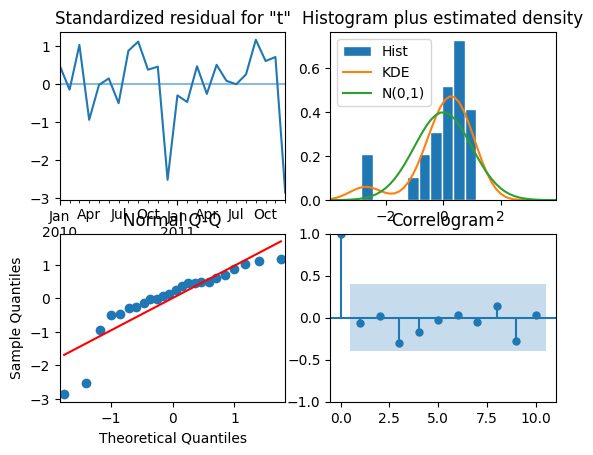

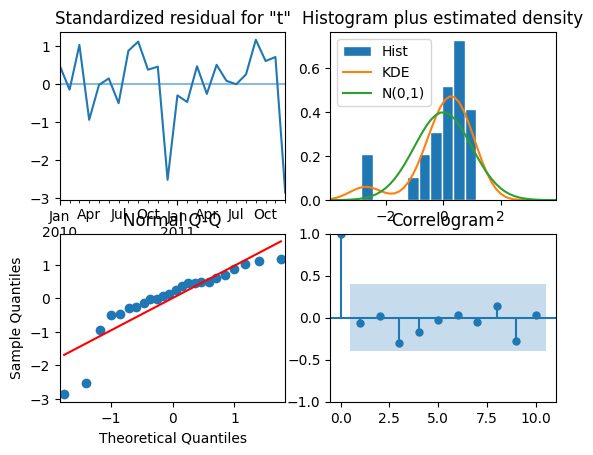

In [141]:
results_arima.plot_diagnostics()

In [142]:
# GridSearchV

In [168]:
from sklearn.model_selection import GridSearchCV
import itertools

In [167]:
P=D=Q=p=d=q=range(0,3)
S=12

In [170]:
combinations=list(itertools.product(p,d,q,P,D,Q))

In [173]:
3**6

729

In [191]:
arima_order=[(x[0],x[1],x[2]) for x in combinations]
seasonal_order=[(x[3],x[4],x[5],S) for x in combinations]


In [192]:
len(arima_order),len(seasonal_order)

(729, 729)

In [193]:
results_data=pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])


In [194]:
results_data

,p,d,q,P,D,Q,AIC


In [202]:
e_c=0
for i in tqdm(range(len(combinations))):
    try:
        
        model=SARIMAX(month_series['total_sales'],order=arima_order[i],seasonal_order=seasonal_order[i])
        results=model.fit()
        p,d,q=arima_order[i]
        P,D,Q,S=seasonal_order[i]
        results_data.loc[i]=[p,d,q,P,D,Q,results.aic ]
    except Exception as e:
        e_c+=1

100%|████████████████████████████████████████████████████████████████████████████████| 729/729 [04:10<00:00,  2.91it/s]


In [205]:
results_data[results_data.AIC==min(results_data.AIC)]

,p,d,q,P,D,Q,AIC
87,0.0,1.0,0.0,0.0,2.0,0.0,2.0
168,0.0,2.0,0.0,0.0,2.0,0.0,2.0


In [206]:
best_model=SARIMAX(month_series['total_sales'],order=(0,1,0),seasonal_order=(0,2,0,12))

In [208]:
results=best_model.fit()

In [210]:
fitting=results.get_prediction(start='2009-12-31')
fitting_mean=fitting.predicted_mean

In [214]:
forecast=results.get_forecast(steps=12)
forecast_mean=forecast.predicted_mean

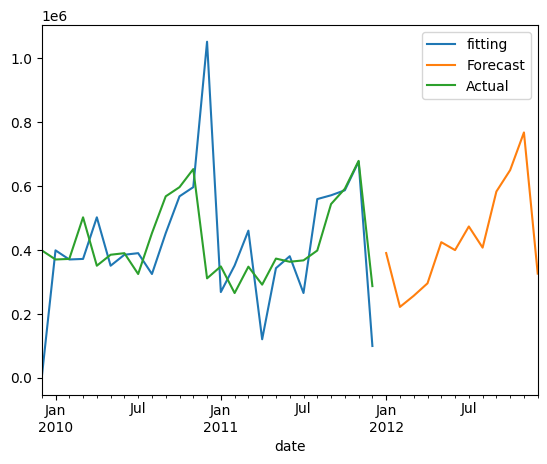

In [217]:
fitting_mean.plot(label='fitting')
forecast_mean.plot(label='Forecast')
month_series['total_sales'].plot(label='Actual')
plt.legend()
plt.show()

In [218]:
mae= abs(month_series['total_sales']-fitting_mean).mean()
mae

np.float64(114693.99333333336)